# Data Visualization in Python

# Setup

## Installation

First install Python (preferably through Anaconda or Miniconda). Activate the base environment (if necessary), which contains the basic data wrangling, visualization and scientific computing packages that you'll need.

You'll need to install one more package called `adjustText`, which you can do from terminal/shell with the command
`pip install adjustText`.

## Import packages

It's best to call imports up front, both to keep track of packages used, and to have functions available for all cells below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

sns.set()
sns.set_style('darkgrid')
# lines denoted by "#" are comments -- they are purely informational and are not executed
# set up your notebook to display plots directly below cells
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.dpi'] = 100

In [3]:
# this tutorial requires seaborn version >= 0.10
sns.__version__

'0.10.0'

# Introduction to seaborn and matplotlib

`seaborn` is a data visualization library built on top of the lower-level `matplotlib` library. Its framework can be more intuitive to work with and its defaults for visualization are somewhat more aesthetically pleasing than `matplotlib`. On the other hand, `matplotlib` can provide more flexibility with complex plots. `matplotlib` was originally created to make plots easy to create and manipulate, with a MATLAB-like interface. 

Unlike `ggplot2` in R, it is not based on any particular visualization philosophy; rather `seaborn` focuses on setting up axes objects and programmatically adding manipulations to these axes objects. Note that a few of `seaborn`'s functions (like `scatterplot`) do resemble some `ggplot2` functions in their style of arguments.  

To get started with visualizations, we will use the anscombe data, which contains four sets which have the same  statistical properties (mean, variance, etc.), yet are visually distinguishable.

In [4]:
# Load the example dataset for Anscombe's quartet
df_ans = sns.load_dataset("anscombe")
# Calculate summary statistics with pandas
df_ans.groupby('dataset').agg([np.mean, np.var, np.std])

x                         y                    
        mean   var       std      mean       var       std
dataset                                                   
I        9.0  11.0  3.316625  7.500909  4.127269  2.031568
II       9.0  11.0  3.316625  7.500909  4.127629  2.031657
III      9.0  11.0  3.316625  7.500000  4.122620  2.030424
IV       9.0  11.0  3.316625  7.500909  4.123249  2.030579

## Scatterplots

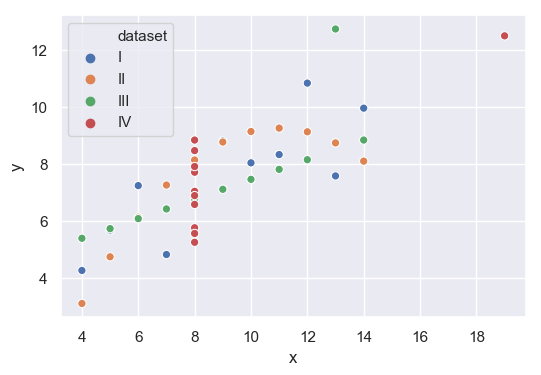

In [5]:
# Note the similarity to ggplot2 in specifying the dataframe and then referencing columns directly
sns.scatterplot(x = "x", y = "y", data = df_ans, hue = "dataset")

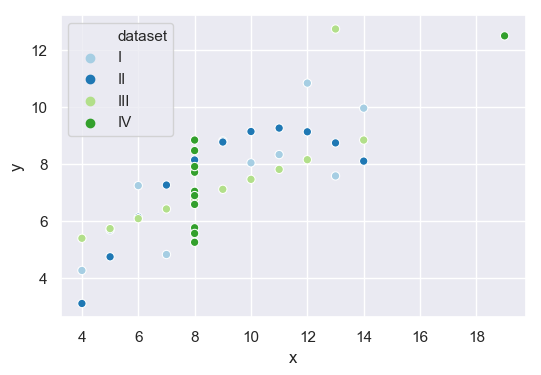

In [6]:
# can we apply a more useful color palette?
# use the "palette" argument in scatterplot
sns.scatterplot(x = "x", y = "y", data = df_ans, hue = "dataset", palette = "Paired")

It's still a little hard to see the dataset distributions -- maybe we can split up the plots by dataset.

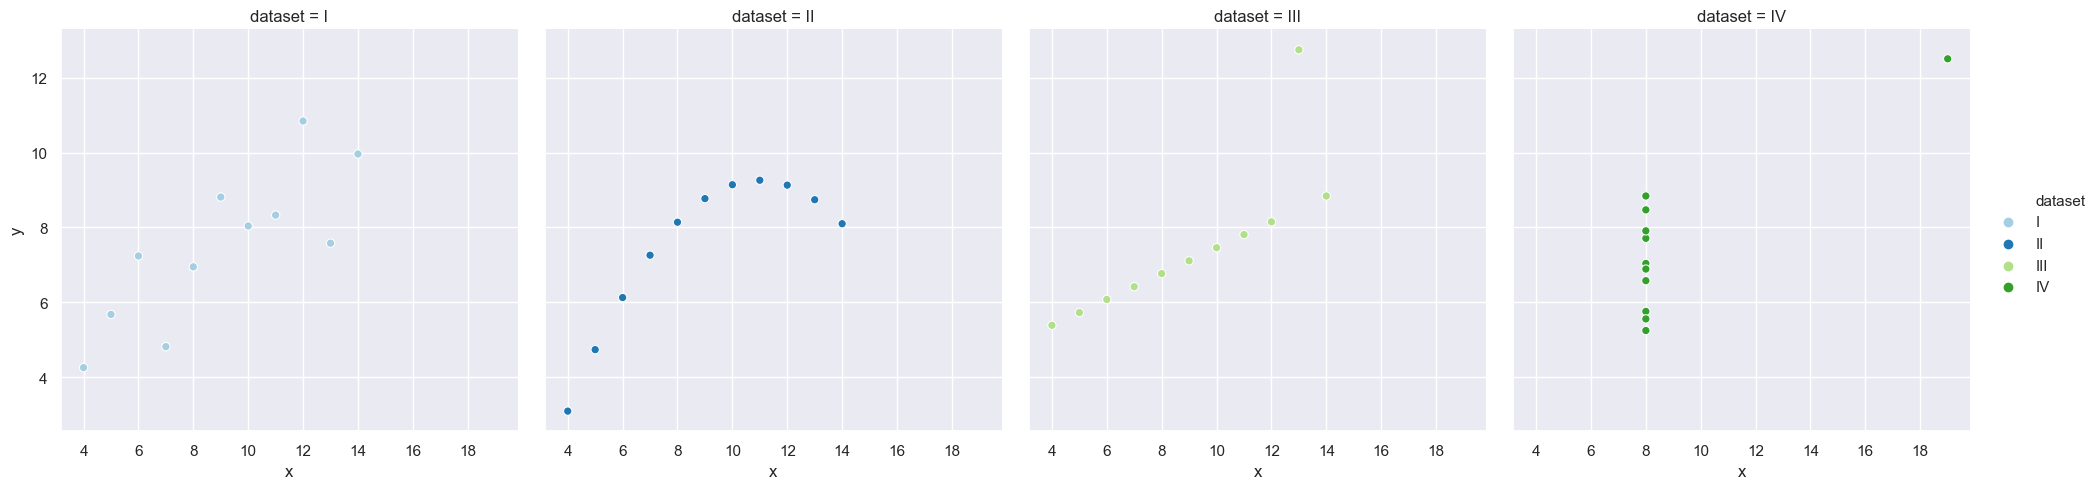

In [7]:
# relplot is seaborn's version of facet_wrap
sns.relplot(x="x", y="y", data = df_ans,
            col="dataset", hue = "dataset", palette = "Paired",
            kind="scatter")

# DepMap Data

In order to pracitice visualizing data with thousands of observations while also investigating a biologically relevant question, we will use data from the Broad’s [Cancer Dependency Map](https://depmap.org/portal/), a compendium of genome-wide CRISPR screens across hundreds of cancer cell lines, to identify genetic vulnerabilities.

## Preparing Data

Here we're using the package `pandas` to read in and and prepare our data for analysis. This is not the focus of our current workshop, but a few explanatory comments are included. You can find more information in the documentation [here](https://pandas.pydata.org/pandas-docs/stable/index.html).

In [8]:
# read in the data
gene_effect = pd.read_csv('example_data/Achilles_gene_effect.csv.zip')
cell_line_info = pd.read_csv('example_data/sample_info.csv.zip')

# rename the first column
gene_effect = gene_effect.rename(columns = {"Unnamed: 0": "DepMap_ID"})
# convert from wide to long data frame 
gene_effect_tidy = pd.melt(gene_effect, id_vars=['DepMap_ID'], var_name = 'Gene (ID)', 
                           value_name = 'CERES score')

# merge cell line info and gene effect datasets by shared columns
joined_effects_cell_info = pd.merge(gene_effect_tidy, cell_line_info)
joined_effects_cell_info.head()

,DepMap_ID,Gene (ID),CERES score,stripped_cell_line_name,CCLE_Name,alias,COSMIC_ID,lineage,lineage_subtype,lineage_sub_subtype,...,culture_medium,cas9_activity,RRID,sample_collection_site,primary_or_metastasis,disease,disease_subtype,age,Sanger_model_ID,additional_info
0,ACH-000004,A1BG (1),0.175458,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,blood,AML,M6,...,RPMI-1640: 10%FBS,47.6,CVCL_0001,haematopoietic_and_lymphoid_tissue,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN
1,ACH-000004,A1CF (29974),0.088569,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,blood,AML,M6,...,RPMI-1640: 10%FBS,47.6,CVCL_0001,haematopoietic_and_lymphoid_tissue,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN
2,ACH-000004,A2M (2),-0.200480,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,blood,AML,M6,...,RPMI-1640: 10%FBS,47.6,CVCL_0001,haematopoietic_and_lymphoid_tissue,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN
3,ACH-000004,A2ML1 (144568),-0.011510,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,blood,AML,M6,...,RPMI-1640: 10%FBS,47.6,CVCL_0001,haematopoietic_and_lymphoid_tissue,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN
4,ACH-000004,A3GALT2 (127550),0.038665,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,blood,AML,M6,...,RPMI-1640: 10%FBS,47.6,CVCL_0001,haematopoietic_and_lymphoid_tissue,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN


## CERES Score

CERES score is a measure of a gene essentiality in a cell line from a CRISPR-Cas9 genome-wide screen. A score less than or equal to -1 indicates a gene is essential, whereas a score close to 0 indicates little to no phenotypic effect. See [DepMap](https://depmap.org/ceres/) for more details.

In this next section we're visualizing the distribution of CERES scores across all genes and cell lines. We're actually using a mix of `seaborn` and `matplotlib` commands but that's okay! Remember that `seaborn` is just built on top of `matplotlib`.

/Users/vkozarev/miniconda3/envs/classifier2/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


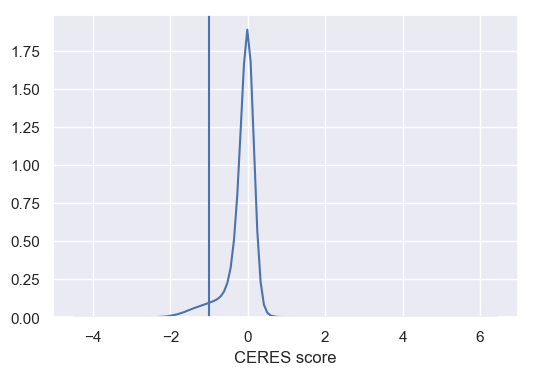

In [9]:
# note that here we don't specify a dataset (unlike in the scatterplot function above)
# distplot gives the option to plot a histogram (we don't want it here)
sns.distplot(joined_effects_cell_info['CERES score'], hist = False)
# add a vertical line at -1
plt.axvline(-1)

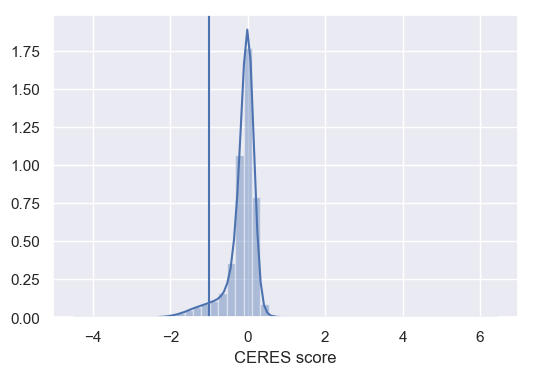

In [10]:
# let's try it with the histogram
sns.distplot(joined_effects_cell_info['CERES score'], hist = True)
plt.axvline(-1)

## Leukemia dependencies

With this datset we can ask - which genes are selectively essential in leukemia cell lines? Identifying these selective vulnerabilities can help accelerate the development of precision treatment.

To answer this question, we take the median CERES score for Leukemia cell lines vs the median score for all other cell lines. Taking the difference between these scores, we see that MYB is the top differential dependency.

In [11]:
# here we're using a construct called a list comprehension to create a new column
joined_effects_cell_info['ctype'] = ['Leukemia' if disease == 'Leukemia' else 'other' 
                                    for disease in joined_effects_cell_info['disease']] 
# grouping and summarizing the data
summarized = joined_effects_cell_info.groupby(['Gene (ID)', 'ctype']).agg({'CERES score': np.median})
leukemia_dependency = summarized.unstack()
leukemia_dependency.columns = leukemia_dependency.columns.droplevel()
# calculating difference between CERES for leukemia and other cell lines
leukemia_dependency['delta'] = leukemia_dependency['Leukemia'] - leukemia_dependency['other']
# sorting by delta value
leukemia_dependency = leukemia_dependency.sort_values(by = 'delta').reset_index()
leukemia_dependency.head()

ctype,Gene (ID),Leukemia,other,delta
0,MYB (4602),-1.298287,-0.382577,-0.915710
1,CBFB (865),-0.953078,-0.195178,-0.757900
2,TYMS (7298),-1.040121,-0.386041,-0.654079
3,LMO2 (4005),-0.615741,0.027785,-0.643526
4,NAMPT (10135),-0.813005,-0.182566,-0.630438


### Scatterplots

Now we’ll plot the median CERES score of non-Leukemia vs Leukemia cell lines. Here we can see the leukemia and non-leukemia CERES scores are well correlated, although there are some outliers.

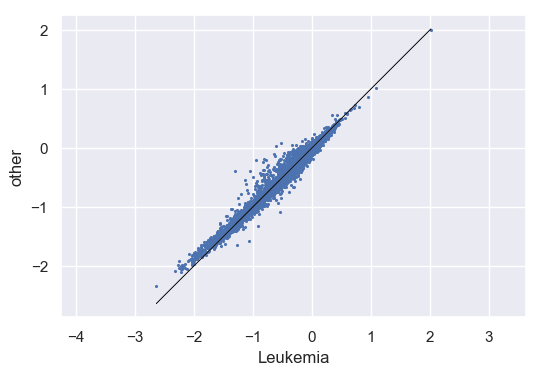

In [12]:
sns.scatterplot(data = leukemia_dependency, x = 'Leukemia', y = 'other', s = 5, linewidth=0)
# the s argument sets the point size
# equalize the axes
plt.axis('equal')
# plot a y=x reference line
# -k specifies the line type (-) and color (k = black)
plt.plot(leukemia_dependency.Leukemia, leukemia_dependency.Leukemia, '-k', linewidth= 0.5)

Often, it is helpful to know the density of points in an dense scatterplot. `seaborn` has a couple of different options for visualizing the density/distributions of these points, which differ from the basic ones that `ggplot2` offers. The first and most common is a `jointplot` showing the 1-D distributions of the two types of dependency scores we're plotting.

/Users/vkozarev/miniconda3/envs/classifier2/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


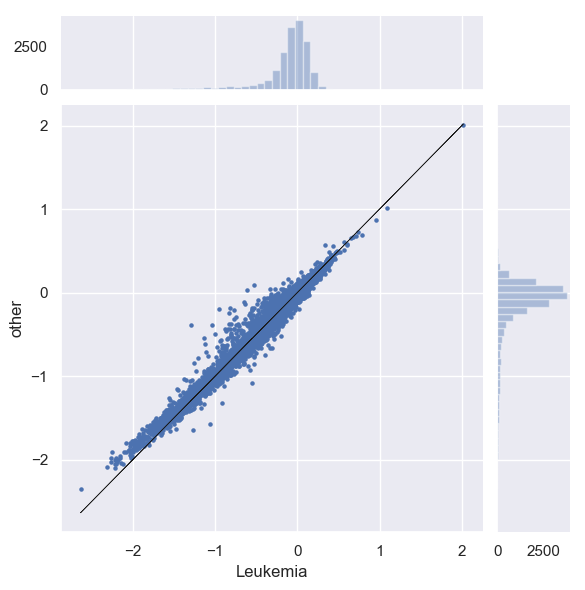

In [13]:
# since we're introducing more nuanced manipulations here, we are saving our axis objects
# note the g = ... construct
g = sns.jointplot(x="Leukemia", y="other", data=leukemia_dependency, s = 5)
# plot the y=x reference line
g.ax_joint.plot(leukemia_dependency.Leukemia, leukemia_dependency.Leukemia, '-k', linewidth= 0.5)

# this allows us to see the axis labels for the side histograms
for tick in g.ax_marg_x.get_yticklabels():
    tick.set_visible(True)
for tick in g.ax_marg_y.get_xticklabels():
    tick.set_visible(True)

Unlike in `ggplot2`, we can't easily color the points by neighbor density without introducing custom scripts. However, we can approximate this with the hex option in `jointplot`, which will display an approximation of the point distribution colored by point neighbor density.

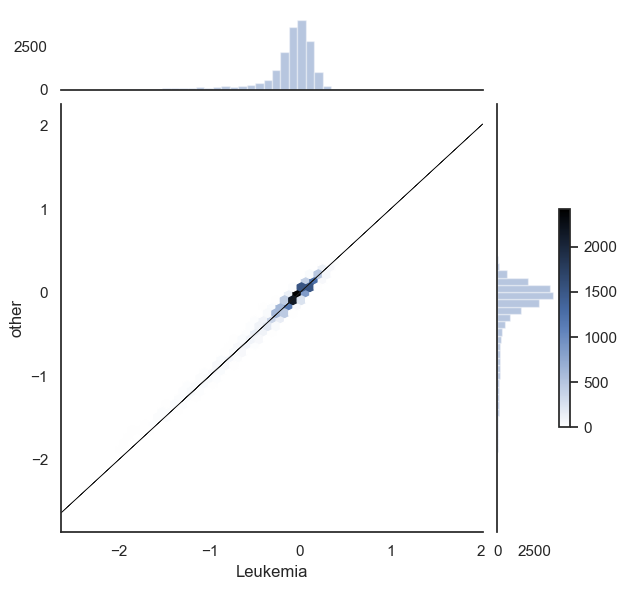

In [14]:
# temporarily setting the seaborn style to white background
with sns.axes_style("white"):
    g = sns.jointplot(x="Leukemia", y="other", data=leukemia_dependency, kind="hex")
    g.ax_joint.plot(leukemia_dependency.Leukemia, leukemia_dependency.Leukemia, '-k', linewidth= 0.5)
    
    # show histogram axis labels
    for tick in g.ax_marg_x.get_yticklabels():
        tick.set_visible(True)
    for tick in g.ax_marg_y.get_xticklabels():
        tick.set_visible(True)
    # display the colorbar
    plt.colorbar()

For the next few plots, we'll continue with the original jointplot, so that we can add labels to individual points.

Suppose we want to label the top hits in our scatterplot. We can do this with `matplotlib`'s `text` function, and then adjust the text labels to have more appropriate locations with `adjust_text` from the `adjustText` package.

In [15]:
# determine which genes are most selectively dependent for Leukemia cell lines
top_dependencies = leukemia_dependency.nsmallest(3, 'delta')
top_dependencies

ctype,Gene (ID),Leukemia,other,delta
0,MYB (4602),-1.298287,-0.382577,-0.915710
1,CBFB (865),-0.953078,-0.195178,-0.757900
2,TYMS (7298),-1.040121,-0.386041,-0.654079


3

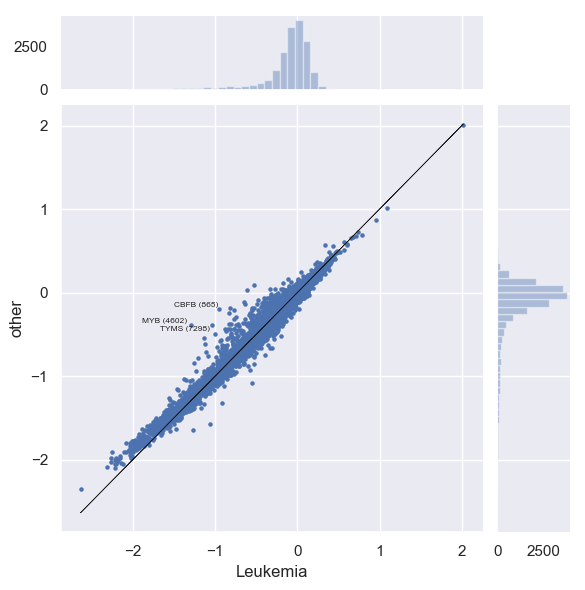

In [16]:
g = sns.jointplot(x="Leukemia", y="other", data=leukemia_dependency, s = 5)
g.ax_joint.plot(leukemia_dependency.Leukemia, leukemia_dependency.Leukemia, '-k', linewidth= 0.5)

# show histogram axis labels
for tick in g.ax_marg_x.get_yticklabels():
    tick.set_visible(True)
for tick in g.ax_marg_y.get_xticklabels():
    tick.set_visible(True)

# create text labels with a list comprehension
# s specifies the label
texts = [g.ax_joint.text(x = leukemia_dependency.Leukemia[i], 
                         y = leukemia_dependency.other[i], 
                         s = top_dependencies['Gene (ID)'][i], 
                         fontsize = 6) 
         for i in top_dependencies.index]
# use function adust_text from package adjustText (similar to ggrepel for R)
adjust_text(texts, x = leukemia_dependency.Leukemia, y = leukemia_dependency.other, ax=g.ax_joint)

### Exercise

What are the top 3 buffering dependencies (i.e. greatest positive difference) for Leukemia cell lines? Can you label them in a scatterplot?

### Exercise answer

In [17]:
top_buffering = leukemia_dependency.nlargest(3, 'delta')
top_buffering

ctype,Gene (ID),Leukemia,other,delta
18332,CCND1 (595),-0.546439,-1.085151,0.538712
18331,THAP1 (55145),-1.057355,-1.568499,0.511144
18330,KIF18A (81930),-0.911749,-1.323398,0.411649


The top buffering dependencies are CCND1, THAP1, and KIF18A. We can also label these in a scatter plot below.

6

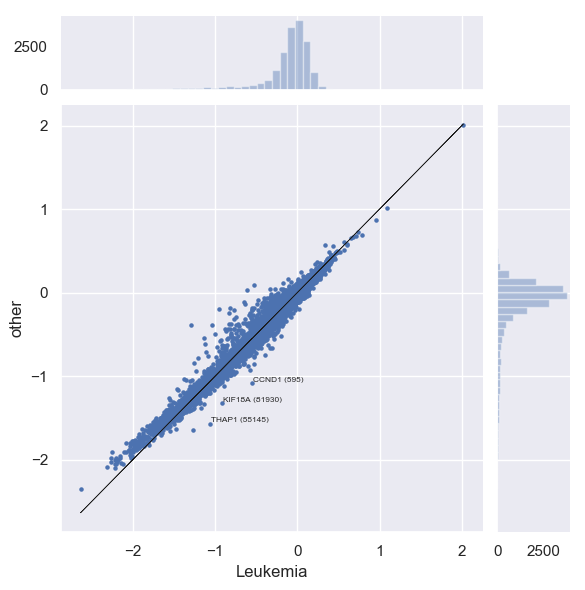

In [18]:
g = sns.jointplot(x="Leukemia", y="other", data=leukemia_dependency, s = 5)
g.ax_joint.plot(leukemia_dependency.Leukemia, leukemia_dependency.Leukemia, '-k', linewidth= 0.5)

# show histogram axis labels
for tick in g.ax_marg_x.get_yticklabels():
    tick.set_visible(True)
for tick in g.ax_marg_y.get_xticklabels():
    tick.set_visible(True)

# this time label the top buffering points
texts = [g.ax_joint.text(x = leukemia_dependency.Leukemia[i], 
                         y = leukemia_dependency.other[i], 
                         s = top_buffering['Gene (ID)'][i], 
                         fontsize = 6) 
         for i in top_buffering.index]
adjust_text(texts, x = leukemia_dependency.Leukemia, y = leukemia_dependency.other, ax=g.ax_joint)

### Boxplots

To gain an understanding for another type of plot at our disposal, we will use boxplots to see if there are any Leukemia sublineages which are enriched for our top genes. We can visualize these in two different ways:

**Option 1**: Faceting. Create a subplot for each gene separately. Note that scales along the y axis are cohesive across facets.

We see that MYB is essential for all specified sublineages, whereas CBFB is variable in CML lines and TYMS is variably essential in AML lines.

In [19]:
# subset our data to results for top dependency genes
top_leukemia_genes = joined_effects_cell_info[joined_effects_cell_info['Gene (ID)'].isin(
    top_dependencies['Gene (ID)'].values
)]
# create a new column indicating leukemia subtype
top_leukemia_genes['leukemia_subtype'] = top_leukemia_genes.apply(
    lambda row: row['lineage_subtype'] if row['disease'] == 'Leukemia' else 'non-Leukemia'
, axis = 1).astype('category')

# get order of subtype categories (ordered by median)
cat_order = top_leukemia_genes.groupby('leukemia_subtype').agg(
    {'CERES score': np.median}
).sort_values('CERES score').index.values

/Users/vkozarev/miniconda3/envs/classifier2/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


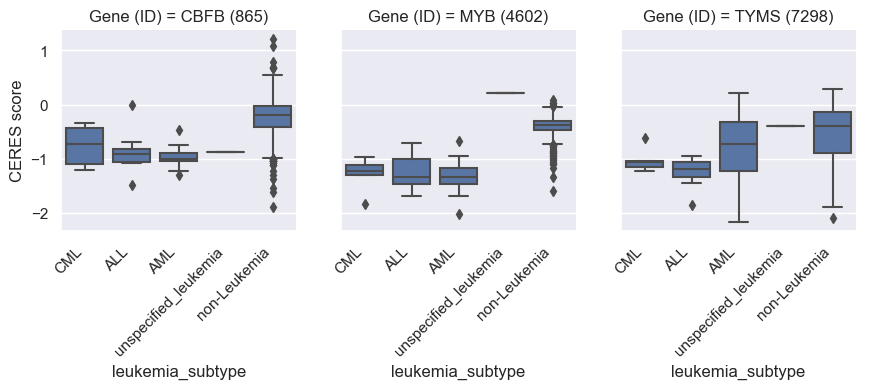

In [20]:
g = sns.FacetGrid(top_leukemia_genes, col="Gene (ID)", sharex = False)
g.map(sns.boxplot, 'leukemia_subtype', 'CERES score', order = cat_order)
# rotate the x-axis labels to make them legible
g.set_xticklabels(rotation=45, ha="right")

**Option 2:** Color by gene.

Visualizing this way, we can see that CBFB is less essential than MYB across leukemia subtypes.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

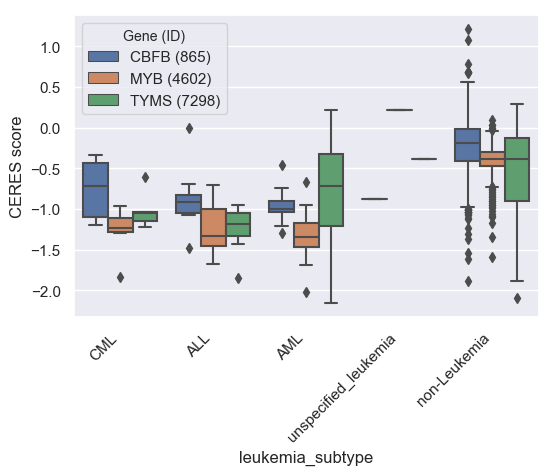

In [21]:
sns.boxplot(x="leukemia_subtype", y="CERES score", hue="Gene (ID)",
            data=top_leukemia_genes,  order = cat_order)
# a different way to rotate x-axis labels
plt.xticks(rotation=45, ha="right")

### Exercise

Are there any subtypes which act differently for the top buffering genes?

### Exercise Answer

In [22]:
# generate top buffering dataframe as before
top_leukemia_buffering = joined_effects_cell_info[joined_effects_cell_info['Gene (ID)'].isin(
    top_buffering['Gene (ID)'].values
)]

top_leukemia_buffering['leukemia_subtype'] = top_leukemia_buffering.apply(
    lambda row: row['lineage_subtype'] if row['disease'] == 'Leukemia' else 'non-Leukemia'
, axis = 1).astype('category')

cat_order_b = top_leukemia_buffering.groupby('leukemia_subtype').agg(
    {'CERES score': np.median}
).sort_values('CERES score').index.values

/Users/vkozarev/miniconda3/envs/classifier2/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

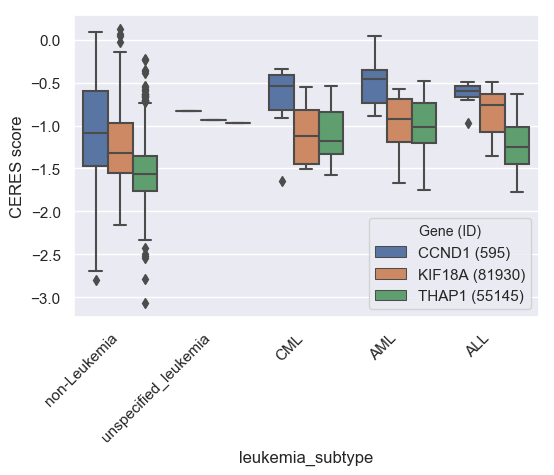

In [23]:
sns.boxplot(x="leukemia_subtype", y="CERES score", hue="Gene (ID)",
            data=top_leukemia_buffering,  order = cat_order_b)
plt.xticks(rotation=45, ha="right")

With this plot we can see that CCND1 appears to be less essential across all leukemia subtypes than the other top buffering genes. In fact, the subtypes appear to be fairly similar with regard to these genes; the major difference seems to be that THAP1 appears more essential than KIF18A for the ALL subtypes (unlike other subtypes).

# References

* [matplotlib](https://matplotlib.org/)
* [seaborn](https://seaborn.pydata.org/)
* [adjustText](https://github.com/Phlya/adjustText/wiki)

In [25]:
# run this to produce an HTML file with table of contents
# !jupyter nbconvert Data_Visualization_Workshop.ipynb --to html_toc

[NbConvertApp] Converting notebook Data_Visualization_Workshop.ipynb to html_toc
[NbConvertApp] Support files will be in Data_Visualization_Workshop_files/
[NbConvertApp] Making directory Data_Visualization_Workshop_files
[NbConvertApp] Making directory Data_Visualization_Workshop_files
[NbConvertApp] Making directory Data_Visualization_Workshop_files
[NbConvertApp] Making directory Data_Visualization_Workshop_files
[NbConvertApp] Making directory Data_Visualization_Workshop_files
[NbConvertApp] Making directory Data_Visualization_Workshop_files
[NbConvertApp] Making directory Data_Visualization_Workshop_files
[NbConvertApp] Making directory Data_Visualization_Workshop_files
[NbConvertApp] Making directory Data_Visualization_Workshop_files
[NbConvertApp] Making directory Data_Visualization_Workshop_files
[NbConvertApp] Making directory Data_Visualization_Workshop_files
[NbConvertApp] Making directory Data_Visualization_Workshop_files
[NbConvertApp] Making directory Data_Visualization_W